<a href="https://colab.research.google.com/github/chauhansrc/Hotel-booking-demand/blob/main/hotel_booking_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel booking demand


![](https://nolimits-tours.com/wp-content/uploads/2017/06/hotel-ambasador-exterior-002.jpg)

This notebook is covering following topics.
* Problem statement
* Downloading the data
* Exploratory data analysis and visualisation
* Preprocessing and Feature Engineering
* Imputing and scaling numerical data
* Encoding categorical data
* Training and evaluating Logistic Regression Model
* Training and evaluating Decision Tree Model
* Training and evaluating  Random Forest Model
* Making Predictions on New Inputs
* Saving and Loading Trained Model

## Problem Statement

**Objective:** Predict the probability of booking cancellation.

>**Context**
>
>Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?
>This hotel booking dataset can help you explore those questions!
>
>**Content**
>
>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

Source of data: https://www.kaggle.com/jessemostipak/hotel-booking-demand

## Downloading the Data

In [ ]:
!pip install opendatasets seaborn --upgrade --quiet

import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
od.download('https://www.kaggle.com/jessemostipak/hotel-booking-demand')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shadeofshadow
Your Kaggle Key: ··········


100%|██████████| 1.25M/1.25M [00:00<00:00, 24.4MB/s]

In [ ]:
os.listdir('hotel-booking-demand/')

['hotel_bookings.csv']

In [ ]:
bookings_df = pd.read_csv('hotel-booking-demand/hotel_bookings.csv')

In [ ]:
bookings_df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [ ]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
print(f"Dataset contains {bookings_df.shape[0]} rows and {bookings_df.shape[1]} columns.")

Dataset contains 119390 rows and 32 columns.


In [ ]:
bookings_df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

## Exploratory Data Analysis and Visualization

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
fig = px.histogram(bookings_df,
                   x='is_canceled')

fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(bookings_df,
                   x='hotel',
                   color='is_canceled')

fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(bookings_df.sample(1000),
                   x='lead_time',
                   color='is_canceled',
                   marginal='box',
                   title='Lead Time')

fig.update_layout(bargap=0.1)
fig.show()

# lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

In [ ]:
px.histogram(bookings_df,
                 x='previous_cancellations',
                 y='previous_bookings_not_canceled',
                 color='is_canceled').update_layout(bargap=0.1)


In [ ]:
fig = px.histogram(bookings_df,
             x='arrival_date_year',
             color='is_canceled',
             color_discrete_sequence=px.colors.qualitative.G10,
             labels={'arrival_date_year': 'Arrival date (year)', 'is_canceled': 'Is canceled?'},
             title='Year of arrival')

fig.update_layout(bargap=0.1)
fig.update_xaxes(type='category')
fig.show()


In [ ]:
fig = px.histogram(bookings_df,
             x='arrival_date_month',
             color='is_canceled',
             color_discrete_sequence=px.colors.qualitative.G10,
             labels={'arrival_date_month': 'Arrival month', 'is_canceled': 'Is canceled?'},
             title='Month of arrival')

fig.update_layout(bargap=0.1)
fig.update_xaxes(type='category')
fig.show()


In [ ]:
fig = px.histogram(bookings_df, 
             x='is_repeated_guest',
             color='is_canceled',
             facet_col='hotel')
fig.update_layout(bargap=0.1)
fig.update_xaxes(type='category')
fig.show()

In [ ]:
top_countries = list(bookings_df.country.value_counts().head(10).index)
top_countries

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

In [ ]:
fig = px.histogram(bookings_df[bookings_df.country.isin(top_countries)],
             x='country',
             color='is_canceled',
             facet_col='hotel')
fig.update_layout(bargap=0.1)
fig.update_layout(title='Bookings by countries (Top 10)')
# fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
bookings_df.corr()

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   
previous_bookings_not_canceled    -0.057358  -0.073548           0.029218   
booking_changes                   -0.144381   0.000149           0.030872   
agent                             -0.083114  -0.069741           0.063457   
company                           -0.020642   0.151464           0.259095   
days_in_waiting_list               0.054186   0.170084          -0.056497   
adr                                0.047557  -0.063077           0.197580   
required_car_parking_spaces       -0.195498  -0.116451          -0.013684   
total_of_special_requests         -0.234658  -0.095712           0.108531   

                                arrival_date_week_number  \
is_canceled                                     0.008148   
lead_time                                       0.126871   
arrival_date_year                              -0.540561   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066809   
stays_in_weekend_nights                         0.018208   
stays_in_week_nights                            0.015558   
adults                                          0.025909   
children                                        0.005518   
babies                                          0.010395   
is_repeated_guest                              -0.030131   
previous_cancellations                          0.035501   
previous_bookings_not_canceled                 -0.020904   
booking_changes                                 0.005508   
agent                                          -0.031201   
company                                        -0.076760   
days_in_waiting_list                            0.022933   
adr                                             0.075791   
required_car_parking_spaces                     0.001920   
total_of_special_requests                       0.026149   

                                arrival_date_day_of_month  \
is_canceled                                     -0.006130   
lead_time                                        0.002268   
arrival_date_year                               -0.000221   
arrival_date_week_number                         0.066809   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016354   
stays_in_week_nights                            -0.028174   
adults                                          -0.001566   
children                                         0.014544   
babies                                          -0.000230   
is_repeated_guest                               -0.006145   
previous_cancellations                          -0.027011   
previous_bookings_not_canceled                  -0.000300   
booking_changes                                  0.010613   
agent                                            0.001487   
company                                          0.044858   
days_in_waiting_list                             0.022728   
adr                                              0.0302

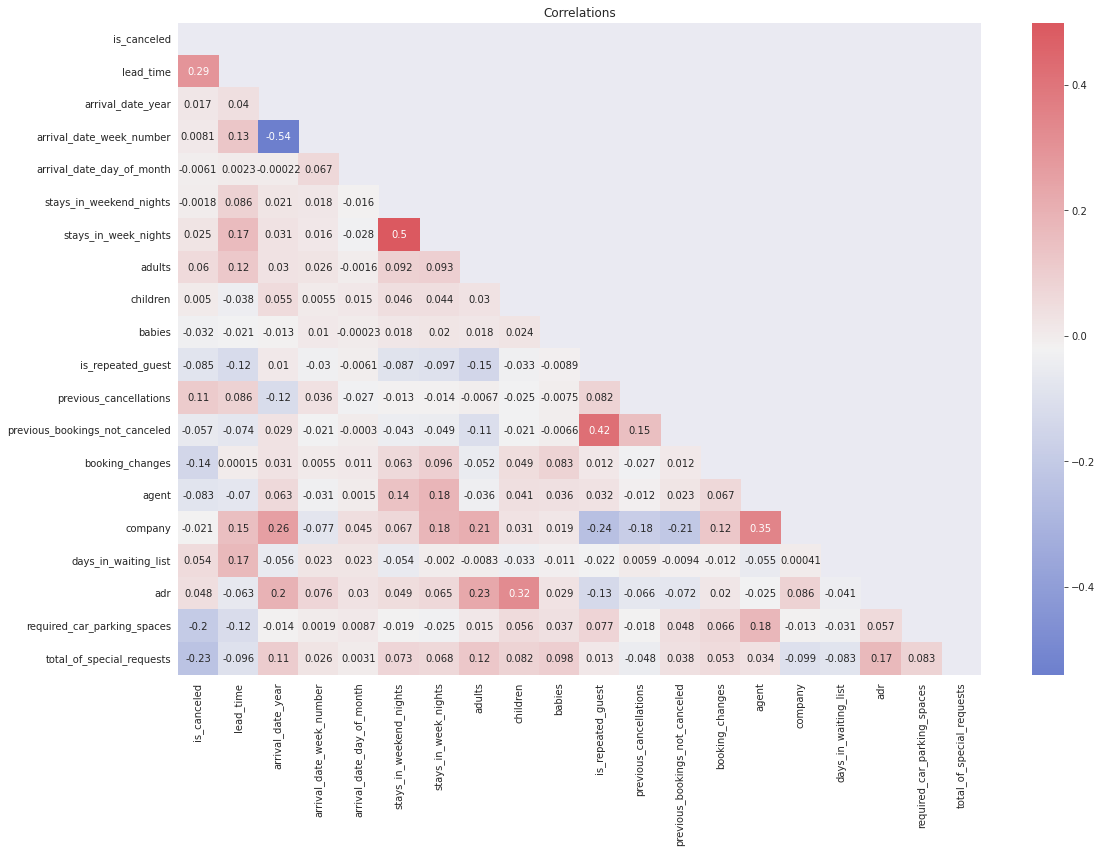

In [ ]:
plt.figure(figsize=(18, 12))
plt.title('Correlations')
cmap = sns.diverging_palette(260, 10, l=55, s=60, as_cmap=True)
mask = np.triu(np.ones_like(bookings_df.corr()))

sns.heatmap(bookings_df.corr(), mask=mask, annot=True, cmap=cmap);

## Preprocessing and Feature Engineering

In [ ]:
bookings_df.sample(10)

hotel  is_canceled  lead_time  arrival_date_year  \
12335   Resort Hotel            1        278               2017   
45122     City Hotel            0         60               2015   
107347    City Hotel            0          1               2017   
5343    Resort Hotel            1         93               2016   
77884     City Hotel            0         17               2015   
26514   Resort Hotel            0         83               2016   
62914     City Hotel            1         61               2017   
95124     City Hotel            0          0               2016   
56323     City Hotel            1        420               2016   
42804     City Hotel            0         17               2015   

       arrival_date_month  arrival_date_week_number  \
12335                June                        25   
45122             October                        42   
107347              March                        10   
5343                April                        18   
77884           September                        39   
26514                July                        31   
62914             January                         4   
95124              August                        33   
56323           September                        36   
42804           September                        37   

        arrival_date_day_of_month  stays_in_weekend_nights  \
12335                          24                        4   
45122                          16                        2   
107347                         11                        0   
5343                           25                        2   
77884                          26                        2   
26514                          25                        3   
62914                          25                        0   
95124                           9                        1   
56323                           3                        2   
42804                          10                        2   

        stays_in_week_nights  adults  children  babies meal country  \
12335                      6       1       0.0       0   BB     IRL   
45122                      2       2       1.0       0   BB     NLD   
107347                     1       2       0.0       0   SC     FRA   
5343                       5       2       2.0       0   BB     PRT   
77884                      2       1       0.0       0   BB     USA   
26514                      5       2       0.0       0   BB     PRT   
62914                      2       2       0.0       0   BB     PRT   
95124                      5       2       0.0       0   BB     NLD   
56323                      2       2       0.0       0   BB     PRT   
42804                      3       2       0.0       0   BB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
12335       Online TA                TA/TO                  0   
45122   Offline TA/TO                TA/TO                  0   
107347         Direct               Direct                  0   
5343        Online TA                TA/TO                  0   
77884          Groups                TA/TO                  0   
26514          Groups            Corporate                  0   
62914          Groups                TA/TO                  0   
95124       Online TA                TA/TO                  0   
56323          Groups                TA/TO                  0   
42804       Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
12335                        0                               0   
45122                        0                               0   
107347                       0                               0   
5343                         0                               0   
77884                        0                               0   
26514                        0                               0   
62914                       

In [ ]:
bookings_df.is_canceled = bookings_df.is_canceled.astype('object')
bookings_df.is_repeated_guest = bookings_df.is_repeated_guest.astype('object')
bookings_df.agent = bookings_df.agent.astype('object')
bookings_df.company = bookings_df.company.astype('object')
bookings_df.adr = bookings_df.adr.astype('object')

In [ ]:
bookings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Create new features**

In [ ]:
bookings_df['total_children'] = bookings_df.children + bookings_df.babies

In [ ]:
bookings_df['total_people'] = bookings_df.total_children + bookings_df.adults

In [ ]:
bookings_df.sample(10)

hotel is_canceled  lead_time  arrival_date_year  \
79718     City Hotel           1         60               2015   
92897     City Hotel           0         97               2016   
6607    Resort Hotel           1        177               2016   
49908     City Hotel           1        270               2016   
25102   Resort Hotel           0          0               2016   
62315     City Hotel           1        129               2017   
61625     City Hotel           1         35               2016   
13926   Resort Hotel           0          6               2017   
100807    City Hotel           0         68               2016   
55808     City Hotel           1        127               2016   

       arrival_date_month  arrival_date_week_number  \
79718            December                        53   
92897                July                        29   
6607                 June                        26   
49908               April                        17   
25102                June                        25   
62315             January                         2   
61625            December                        52   
13926                July                        30   
100807            October                        45   
55808              August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
79718                          29                        2   
92897                          12                        0   
6607                           20                        1   
49908                          20                        0   
25102                          13                        1   
62315                           8                        2   
61625                          20                        0   
13926                          26                        0   
100807                         30                        2   
55808                          21                        3   

        stays_in_week_nights  adults  children  babies meal country  \
79718                      6       2       0.0       0   BB     PRT   
92897                      2       2       1.0       0   BB     USA   
6607                       5       2       0.0       0   BB     PRT   
49908                      4       2       0.0       0   BB     PRT   
25102                      1       2       0.0       0   BB     PRT   
62315                      1       1       0.0       0   BB     PRT   
61625                      2       2       0.0       0   BB     JPN   
13926                      1       1       0.0       0   BB     PRT   
100807                     1       2       0.0       0   BB     ITA   
55808                      5       2       0.0       0   BB     ESP   

       market_segment distribution_channel is_repeated_guest  \
79718       Online TA                TA/TO                 0   
92897       Online TA                TA/TO                 0   
6607        Online TA                TA/TO                 0   
49908   Offline TA/TO                TA/TO                 0   
25102          Direct               Direct                 0   
62315          Groups                TA/TO                 0   
61625       Online TA                TA/TO                 0   
13926       Corporate            Corporate                 0   
100807      Online TA                TA/TO                 0   
55808          Direct               Direct                 0   

        previous_cancellations  previous_bookings_not_canceled  \
79718                        1                               0   
92897                        0                               0   
6607                         0                               0   
49908                        0                               0   
25102                        0                               0   
62315                        0                               0   
61625                        0                    

## Training, Validation and Test Sets

<img src="https://i.imgur.com/j8eITrK.png" width="480">

In [ ]:
# !pip install scikit-learn --upgrade --quiet

from sklearn.model_selection import train_test_split

In [ ]:
# Generic name to original df for simplicity
raw_df = bookings_df

In [ ]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=123)

In [ ]:
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=123)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (71634, 34)
val_df.shape : (23878, 34)
test_df.shape : (23878, 34)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

In [ ]:
train_df = raw_df[raw_df.arrival_date_year < 2017]
val_df = raw_df[(raw_df.arrival_date_year == 2017) & (raw_df.arrival_date_week_number <= 19)]
test_df = raw_df[(raw_df.arrival_date_year == 2017) & (raw_df.arrival_date_week_number > 19)]

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (78703, 34)
val_df.shape : (21097, 34)
test_df.shape : (19590, 34)


In [ ]:
train_df.head()

hotel is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel           0        342               2015               July   
1  Resort Hotel           0        737               2015               July   
2  Resort Hotel           0          7               2015               July   
3  Resort Hotel           0         13               2015               July   
4  Resort Hotel           0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel is_repeated_guest  \
0   BB     PRT         Direct               Direct                 0   
1   BB     PRT         Direct               Direct                 0   
2   BB     GBR         Direct               Direct                 0   
3   BB     GBR      Corporate            Corporate                 0   
4   BB     GBR      Online TA                TA/TO                 0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent company  \
0                  C                3   No Deposit    NaN     NaN   
1                  C                4   No Deposit    NaN     NaN   
2                  C                0   No Deposit    NaN     NaN   
3                  A                0   No Deposit  304.0     NaN   
4                  A                0   No Deposit  240.0     NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

   total_children  total_people  
0             0.0           2.0  
1             0.0           2.0  
2             0.0           1.0  
3             0.0           1.0  
4             0.0           2.0

In [ ]:
val_df.head()

hotel is_canceled  lead_time  arrival_date_year  \
9775  Resort Hotel           1         74               2017   
9776  Resort Hotel           1         62               2017   
9777  Resort Hotel           1         62               2017   
9778  Resort Hotel           1         62               2017   
9779  Resort Hotel           1         71               2017   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
9775            January                         1                          1   
9776            January                         1                          1   
9777            January                         1                          1   
9778            January                         1                          1   
9779            January                         1                          1   

      stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
9775                        1                     0       2       0.0       0   
9776                        2                     2       2       0.0       0   
9777                        2                     2       2       0.0       0   
9778                        2                     2       2       0.0       0   
9779                        2                     2       1       0.0       0   

     meal country market_segment distribution_channel is_repeated_guest  \
9775   BB     PRT      Online TA                TA/TO                 0   
9776   BB     AUT      Online TA                TA/TO                 0   
9777   BB     AUT      Online TA                TA/TO                 0   
9778   BB     AUT      Online TA                TA/TO                 0   
9779   BB     PRT      Online TA                TA/TO                 0   

      previous_cancellations  previous_bookings_not_canceled  \
9775                       0                               0   
9776                       0                               0   
9777                       0                               0   
9778                       0                               0   
9779                       0                               0   

     reserved_room_type assigned_room_type  booking_changes deposit_type  \
9775                  A                  A                0   No Deposit   
9776                  A                  A                0   No Deposit   
9777                  A                  A                0   No Deposit   
9778                  A                  A                0   No Deposit   
9779                  A                  A                0   No Deposit   

      agent company  days_in_waiting_list customer_type    adr  \
9775    5.0     NaN                     0     Transient   57.6   
9776  240.0     NaN                     0     Transient   51.5   
9777  240.0     NaN                     0     Transient   51.5   
9778  240.0     NaN                     0     Transient   51.5   
9779  241.0     NaN                     0     Transient  32.22   

      required_car_parking_spaces  total_of_special_requests  \
9775                            0                          0   
9776                            0                          1   
9777                            0                          1   
9778                            0                          1   
9779                            0                          1   

     reservation_status reservation_status_date  total_children  total_people  
9775           Canceled              2016-10-20             0.0           2.0  
9776           Canceled              2016-12-04             0.0           2.0  
9777           Canceled              2016-11-11             0.0           2.0  
9778           Canceled              2016-12-04             0.0           2.0  
9779           Canceled              2016-10-29             0.0           1.0

In [ ]:
test_df.head()

hotel is_canceled  lead_time  arrival_date_year  \
11528  Resort Hotel           1         47               2017   
11529  Resort Hotel           1        101               2017   
11530  Resort Hotel           1        101               2017   
11531  Resort Hotel           1          3               2017   
11532  Resort Hotel           1         98               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
11528                May                        20                         14   
11529                May                        20                         14   
11530                May                        20                         14   
11531                May                        20                         14   
11532                May                        20                         14   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
11528                        1                     0       2       0.0   
11529                        1                     0       2       0.0   
11530                        1                     0       1       0.0   
11531                        1                     0       2       0.0   
11532                        2                     1       1       0.0   

       babies meal country market_segment distribution_channel  \
11528       0   BB     PRT      Online TA                TA/TO   
11529       0   BB     PRT  Offline TA/TO                TA/TO   
11530       0   BB     PRT  Offline TA/TO                TA/TO   
11531       0   BB     PRT      Corporate            Corporate   
11532       0   BB     DEU      Online TA                TA/TO   

      is_repeated_guest  previous_cancellations  \
11528                 0                       0   
11529                 0                       0   
11530                 0                       0   
11531                 0                       0   
11532                 0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
11528                               0                  A                  A   
11529                               0                  D                  D   
11530                               0                  A                  A   
11531                               0                  A                  A   
11532                               0                  A                  A   

       booking_changes deposit_type  agent company  days_in_waiting_list  \
11528                0   No Deposit  240.0     NaN                     0   
11529                0   No Deposit  251.0     NaN                     0   
11530                0   No Deposit  251.0     NaN                     0   
11531                0   No Deposit    NaN   445.0                     0   
11532                0   No Deposit  240.0     NaN                     0   

         customer_type   adr  required_car_parking_spaces  \
11528        Transient  89.0                            0   
11529  Transient-Party  62.0                            0   
11530  Transient-Party  44.0                            0   
11531        Transient  95.0                            0   
11532        Transient  76.0                            0   

       total_of_special_requests reservation_status reservation_status_date  \
11528                          0           Canceled              2017-04-22   
11529                          0           Canceled              2017-04-18   
11530                          0           Canceled              2017-04-18   
11531                          0           Canceled              2017-05-14   
11532                          2           Canceled              2017-02-25   

       total_children  total_people  
11528             0.0           2.0  
11529             0.0           2.0  
11530             0.0           1.0  
11531             0.0           2.0  
11532             0.0  

## Identifying Input and Target Columns

In [ ]:
train_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_children',
       'total_people'],
      dtype='object')

In [ ]:
# Not using columns to predict 'is_canceled': 'reservation_status', 'reservation_status_date', 'adr',  'agent', 'company'.
input_cols = ['hotel', 'lead_time', 'arrival_date_year',
            'arrival_date_month', 'arrival_date_week_number',
            'arrival_date_day_of_month', 'stays_in_weekend_nights',
            'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
            'country', 'market_segment', 'distribution_channel',
            'is_repeated_guest', 'previous_cancellations',
            'previous_bookings_not_canceled', 'reserved_room_type',
            'assigned_room_type', 'booking_changes', 'deposit_type',
            'days_in_waiting_list', 'customer_type',
            'required_car_parking_spaces', 'total_of_special_requests',
            'total_children', 'total_people']

target_col = 'is_canceled'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

hotel  lead_time  arrival_date_year arrival_date_month  \
0       Resort Hotel        342               2015               July   
1       Resort Hotel        737               2015               July   
2       Resort Hotel          7               2015               July   
3       Resort Hotel         13               2015               July   
4       Resort Hotel         14               2015               July   
...              ...        ...                ...                ...   
104142    City Hotel         17               2016           December   
104145    City Hotel        177               2016           December   
104147    City Hotel        107               2016           December   
104216    City Hotel        310               2016           December   
104219    City Hotel        310               2016           December   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
104142                        53                         30   
104145                        53                         30   
104147                        53                         31   
104216                        53                         27   
104219                        53                         27   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
104142                        2                     5       2       0.0   
104145                        2                     5       0       0.0   
104147                        2                     5       2       0.0   
104216                        2                    10       2       0.0   
104219                        2                    10       2       0.0   

        babies meal country market_segment distribution_channel  \
0            0   BB     PRT         Direct               Direct   
1            0   BB     PRT         Direct               Direct   
2            0   BB     GBR         Direct               Direct   
3            0   BB     GBR      Corporate            Corporate   
4            0   BB     GBR      Online TA                TA/TO   
...        ...  ...     ...            ...                  ...   
104142       0   SC     FRA      Online TA                TA/TO   
104145       0   BB     PRT         Direct               Direct   
104147       0   BB     FRA  Offline TA/TO                TA/TO   
104216       0   SC     DEU      Online TA                TA/TO   
104219       0   SC     DEU      Online TA                TA/TO   

       is_repeated_guest  previous_cancellations  \
0                      0                       0   
1                      0                       0   
2                      0                       0   
3                      0                       0   
4                      0                       0   
...                  ...                     ...   
104142                 0                       0   
104145                 0                       0   
104147                 0                       0   
104216                 0                       0   
104219                 0                       0   

        previous_bookings_not_canceled reserved_ro

In [ ]:
train_targets

0         0
1         0
2         0
3         0
4         0
         ..
104142    0
104145    0
104147    0
104216    0
104219    0
Name: is_canceled, Length: 78703, dtype: object

## Numerical and categorical columns

Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
train_inputs[numeric_cols].describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  78703.000000       78703.000000              78703.000000   
mean     101.298464        2015.720519                 31.577399   
std      106.200649           0.448747                 13.332981   
min        0.000000        2015.000000                  1.000000   
25%       16.000000        2015.000000                 21.000000   
50%       65.000000        2016.000000                 34.000000   
75%      158.000000        2016.000000                 42.000000   
max      737.000000        2016.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               78703.000000             78703.000000   
mean                   15.839943                 0.903968   
std                     8.776052                 0.989566   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                19.000000   

       stays_in_week_nights        adults      children        babies  \
count          78703.000000  78703.000000  78699.000000  78703.000000   
mean               2.447963      1.845241      0.092314      0.008716   
std                1.871663      0.617556      0.377153      0.104656   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      2.000000      0.000000      0.000000   
50%                2.000000      2.000000      0.000000      0.000000   
75%                3.000000      2.000000      0.000000      0.000000   
max               50.000000     55.000000     10.000000     10.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count            78703.000000                    78703.000000   
mean                 0.126018                        0.119538   
std                  1.029279                        1.337751   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       58.000000   

       booking_changes  days_in_waiting_list  required_car_parking_spaces  \
count     78703.000000          78703.000000                 78703.000000   
mean          0.211656              3.399527                     0.066414   
std           0.635416             21.352429                     0.249923   
min           0.000000              0.000000                     0.000000   
25%           0.000000              0.000000                     0.000000   
50%           0.000000              0.000000                     0.000000   
75%           0.000000              0.000000                     0.000000   
max          21.000000            391.000000                     3.000000   

       total_of_special_requests  total_children  total_people  
count               78703.000000    78699.000000  78699.000000  
mean                    0.517007        0.101031      1.946251  
std                     0.757846        0.393886      0.741986  
min                     0.000000        0.000000      0.000000  
25%                     0.000000        0.000000      2.000000  
50%                     0.000000        0.000000      2.000000  
75%                     1.000000        0.000000      2.000000  
max                     5.000000       10.000000     55.000000

In [ ]:
train_inputs[categorical_cols].nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 159
market_segment            8
distribution_channel      5
is_repeated_guest         2
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
dtype: int64

## Imputing Missing Numeric Data


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
raw_df[numeric_cols].isna().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
total_children                    4
total_people                      4
dtype: int64

In [ ]:
imputer.fit(bookings_df[numeric_cols])

SimpleImputer()

In [ ]:
list(imputer.statistics_)

[104.01141636652986,
 2016.156554150264,
 27.16517296255968,
 15.798241058715135,
 0.9275986263506156,
 2.500301532791691,
 1.8564033838679956,
 0.10388990333874994,
 0.007948739425412514,
 0.08711784906608594,
 0.13709690928888515,
 0.22112404724013737,
 2.321149174972778,
 0.06251779881062065,
 0.5713627607002262,
 0.11183890908481732,
 1.9682291055902703]

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].isna().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
total_children                    0
total_people                      0
dtype: int64

## Scaling Numeric Features


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  78703.000000       78703.000000              78703.000000   
mean       0.137447           0.360259                  0.588027   
std        0.144099           0.224374                  0.256403   
min        0.000000           0.000000                  0.000000   
25%        0.021710           0.000000                  0.384615   
50%        0.088195           0.500000                  0.634615   
75%        0.214383           0.500000                  0.788462   
max        1.000000           0.500000                  1.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               78703.000000             78703.000000   
mean                    0.494665                 0.047577   
std                     0.292535                 0.052082   
min                     0.000000                 0.000000   
25%                     0.233333                 0.000000   
50%                     0.500000                 0.052632   
75%                     0.733333                 0.105263   
max                     1.000000                 1.000000   

       stays_in_week_nights        adults      children        babies  \
count          78703.000000  78703.000000  78703.000000  78703.000000   
mean               0.048959      0.033550      0.009231      0.000872   
std                0.037433      0.011228      0.037714      0.010466   
min                0.000000      0.000000      0.000000      0.000000   
25%                0.020000      0.036364      0.000000      0.000000   
50%                0.040000      0.036364      0.000000      0.000000   
75%                0.060000      0.036364      0.000000      0.000000   
max                1.000000      1.000000      1.000000      1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count            78703.000000                    78703.000000   
mean                 0.004847                        0.001660   
std                  0.039588                        0.018580   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                  1.000000                        0.805556   

       booking_changes  days_in_waiting_list  required_car_parking_spaces  \
count     78703.000000          78703.000000                 78703.000000   
mean          0.010079              0.008694                     0.008302   
std           0.030258              0.054610                     0.031240   
min           0.000000              0.000000                     0.000000   
25%           0.000000              0.000000                     0.000000   
50%           0.000000              0.000000                     0.000000   
75%           0.000000              0.000000                     0.000000   
max           1.000000              1.000000                     0.375000   

       total_of_special_requests  total_children  total_people  
count               78703.000000    78703.000000  78703.000000  
mean                    0.103401        0.010103      0.035386  
std                     0.151569        0.039388      0.013490  
min                     0.000000        0.000000      0.000000  
25%                     0.000000        0.000000      0.036364  
50%                     0.000000        0.000000      0.036364  
75%                     0.200000        0.000000      0.036364  
max                     1.000000        1.000000      1.000000

## Encoding Categorical Data


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
raw_df[categorical_cols].nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 177
market_segment            8
distribution_channel      5
is_repeated_guest         2
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
dtype: int64

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# encoder.categories_

In [ ]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['hotel_City Hotel', 'hotel_Resort Hotel', 'arrival_date_month_April', 'arrival_date_month_August', 'arrival_date_month_December', 'arrival_date_month_February', 'arrival_date_month_January', 'arrival_date_month_July', 'arrival_date_month_June', 'arrival_date_month_March', 'arrival_date_month_May', 'arrival_date_month_November', 'arrival_date_month_October', 'arrival_date_month_September', 'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined', 'country_ABW', 'country_AGO', 'country_AIA', 'country_ALB', 'country_AND', 'country_ARE', 'country_ARG', 'country_ARM', 'country_ASM', 'country_ATA', 'country_ATF', 'country_AUS', 'country_AUT', 'country_AZE', 'country_BDI', 'country_BEL', 'country_BEN', 'country_BFA', 'country_BGD', 'country_BGR', 'country_BHR', 'country_BHS', 'country_BIH', 'country_BLR', 'country_BOL', 'country_BRA', 'country_BRB', 'country_BWA', 'country_CAF', 'country_CHE', 'country_CHL', 'country_CHN', 'country_CIV', 'country_CMR', 'country_CN', 'country_COL', 'count

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented 

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train_inputs

hotel  lead_time  arrival_date_year arrival_date_month  \
0       Resort Hotel   0.464043                0.0               July   
1       Resort Hotel   1.000000                0.0               July   
2       Resort Hotel   0.009498                0.0               July   
3       Resort Hotel   0.017639                0.0               July   
4       Resort Hotel   0.018996                0.0               July   
...              ...        ...                ...                ...   
104142    City Hotel   0.023066                0.5           December   
104145    City Hotel   0.240163                0.5           December   
104147    City Hotel   0.145183                0.5           December   
104216    City Hotel   0.420624                0.5           December   
104219    City Hotel   0.420624                0.5           December   

        arrival_date_week_number  arrival_date_day_of_month  \
0                            0.5                   0.000000   
1                            0.5                   0.000000   
2                            0.5                   0.000000   
3                            0.5                   0.000000   
4                            0.5                   0.000000   
...                          ...                        ...   
104142                       1.0                   0.966667   
104145                       1.0                   0.966667   
104147                       1.0                   1.000000   
104216                       1.0                   0.866667   
104219                       1.0                   0.866667   

        stays_in_weekend_nights  stays_in_week_nights    adults  children  \
0                      0.000000                  0.00  0.036364       0.0   
1                      0.000000                  0.00  0.036364       0.0   
2                      0.000000                  0.02  0.018182       0.0   
3                      0.000000                  0.02  0.018182       0.0   
4                      0.000000                  0.04  0.036364       0.0   
...                         ...                   ...       ...       ...   
104142                 0.105263                  0.10  0.036364       0.0   
104145                 0.105263                  0.10  0.000000       0.0   
104147                 0.105263                  0.10  0.036364       0.0   
104216                 0.105263                  0.20  0.036364       0.0   
104219                 0.105263                  0.20  0.036364       0.0   

        babies meal country market_segment distribution_channel  \
0          0.0   BB     PRT         Direct               Direct   
1          0.0   BB     PRT         Direct               Direct   
2          0.0   BB     GBR         Direct               Direct   
3          0.0   BB     GBR      Corporate            Corporate   
4          0.0   BB     GBR      Online TA                TA/TO   
...        ...  ...     ...            ...                  ...   
104142     0.0   SC     FRA      Online TA                TA/TO   
104145     0.0   BB     PRT         Direct               Direct   
104147     0.0   BB     FRA  Offline TA/TO                TA/TO   
104216     0.0   SC     DEU      Online TA                TA/TO   
104219     0.0   SC     DEU      Online TA                TA/TO   

       is_repeated_guest  previous_cancellations  \
0                      0                     0.0   
1                      0                     0.0   
2                      0                     0.0   
3                      0                     0.0   
4                      0                     0.0   
...                  ...                     ...   
104142                 0                     0.0   
104145                 0                     0.0   
104147                 0                     0.0   
104216                 0                     0.0   
104219                 0                     0.0   

        previous_bookings_

## Saving Processed Data to Disk


In [ ]:
!pip install pyarrow --quiet

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [ ]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

**Read Saved Data**

In [ ]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (78703, 269)
train_targets: (78703,)
val_inputs: (21097, 269)
val_targets: (21097,)
test_inputs: (19590, 269)
test_targets: (19590,)


## Training a Logistic Regression Model


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.


In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
weight_df = pd.DataFrame({
    "feature": (numeric_cols + encoded_cols),
    "weight": model.coef_.tolist()[0] 
}).sort_values('weight', ascending=False)

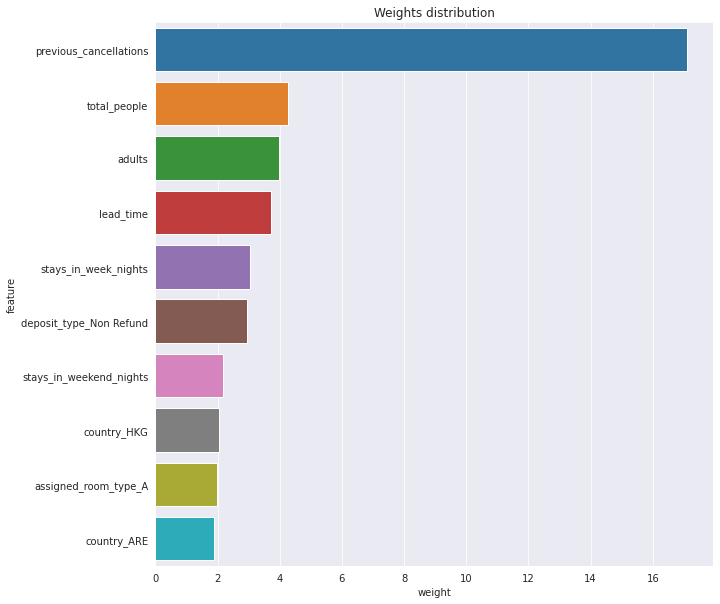

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Weights distribution')
sns.barplot(data=weight_df.head(10), x='weight', y='feature');

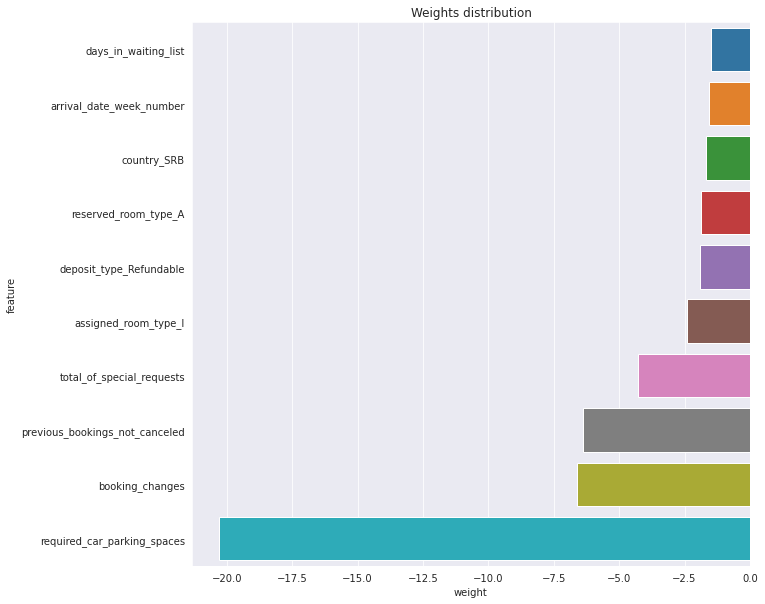

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Weights distribution')
sns.barplot(data=weight_df.tail(10), x='weight', y='feature');

In [ ]:
print(model.intercept_)

[-0.39467965]


## Making Predictions and Evaluating the Model


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds


Accuracy: 83.00%


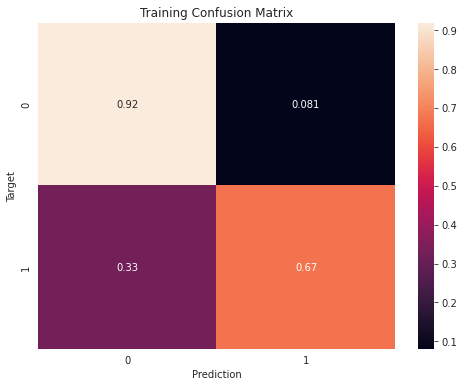

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 79.41%


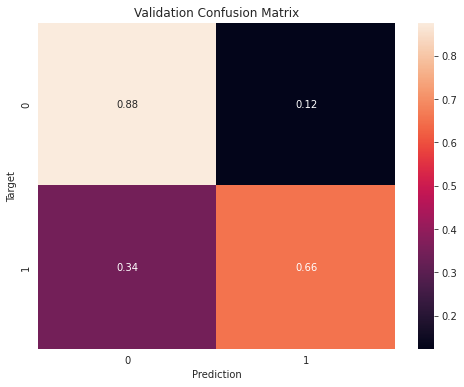

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 76.12%


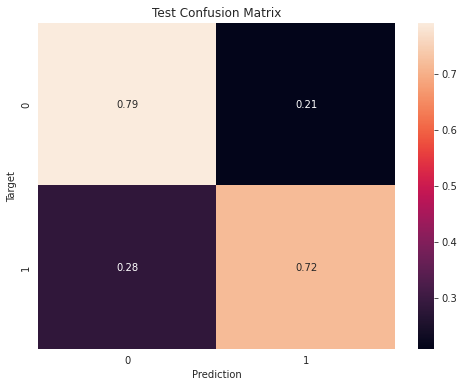

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

**Baseline Model**

In [ ]:
def all_zeroes(inputs):
    return np.full(len(inputs), 0)

base_accuracy = accuracy_score(test_targets, all_zeroes(X_test))
print("Accuracy of base model (always predict 0): {:.2f}%".format(base_accuracy * 100))

Accuracy of base model (always predict 0): 59.85%


## Decision Tree

### Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create the model
model = DecisionTreeClassifier(random_state=11)
# Fit the model to the training data
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=11)

### Visualization

In [ ]:
from sklearn.tree import plot_tree

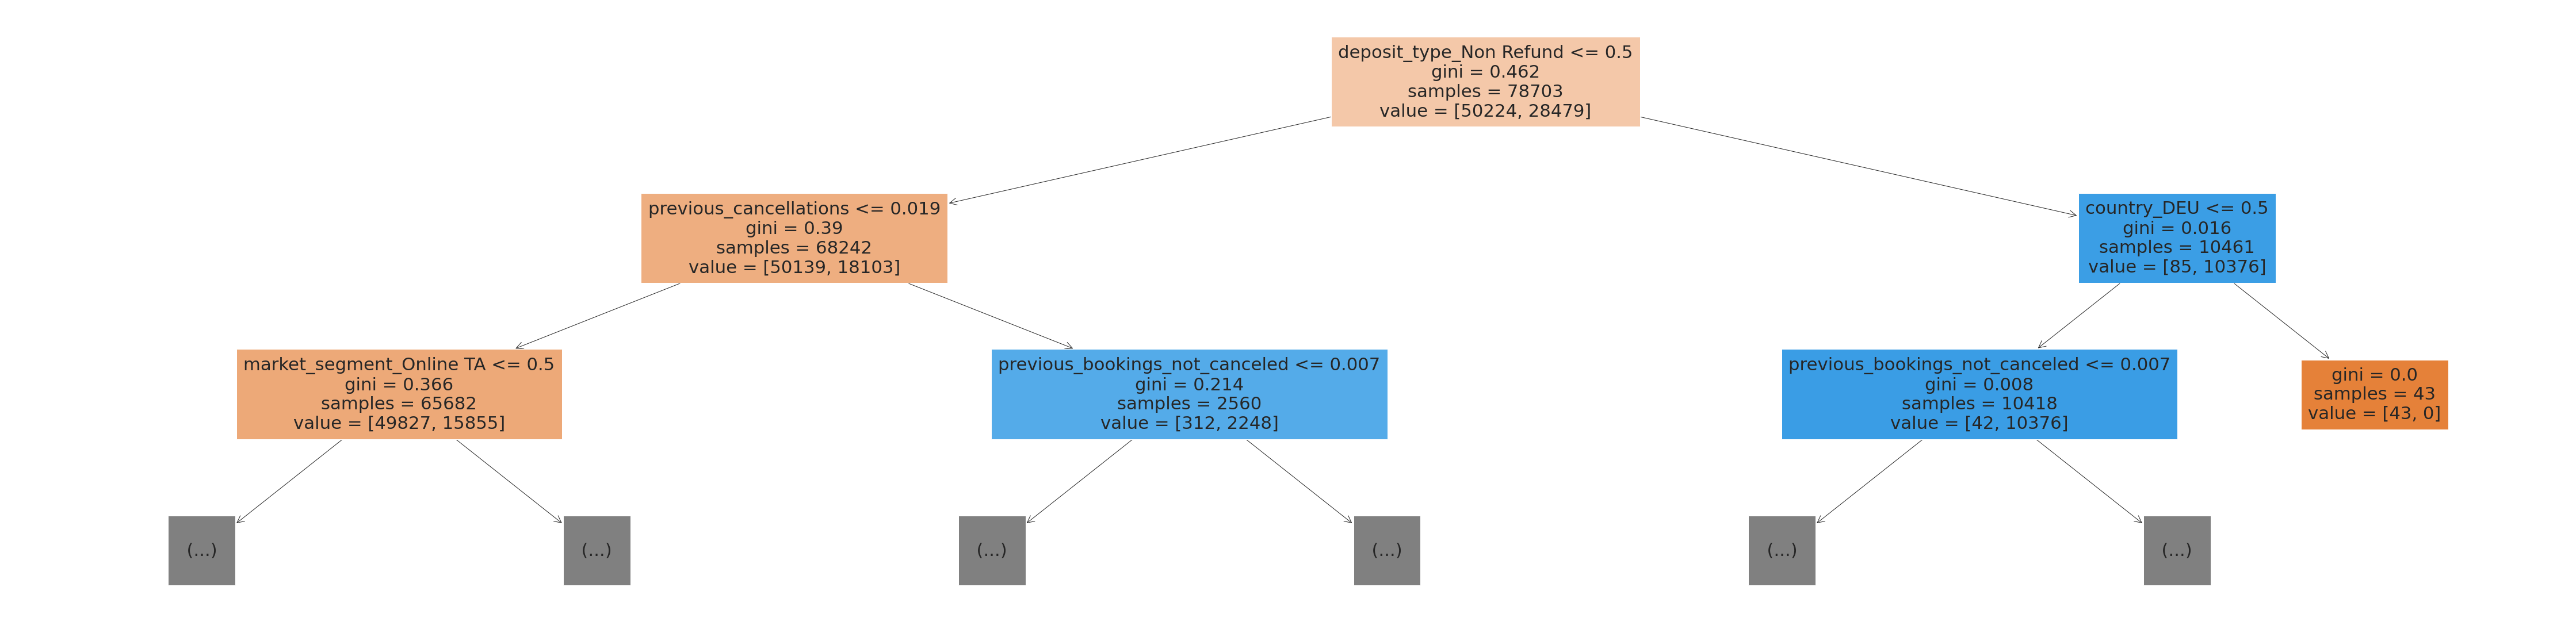

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [ ]:
model.tree_.max_depth

54

### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 99.46%


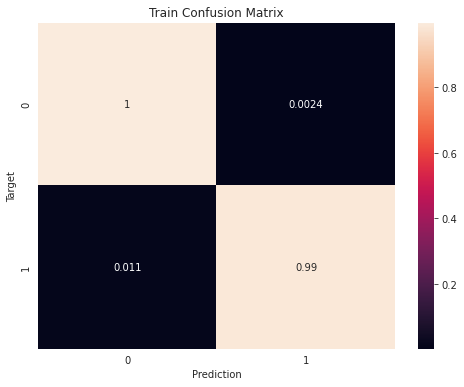

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Train')

Accuracy: 73.90%


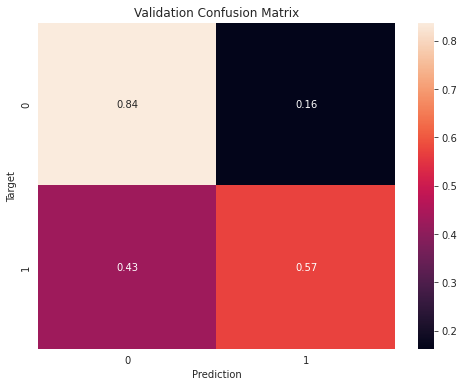

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 71.00%


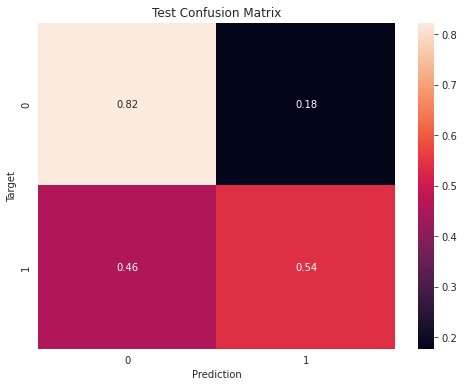

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

Training accuracy score is 99.46% vs. Test accuracy score 71.00% with very high number of false negative results (46%). That means weak generalization of model. We need to investigate feature importance and tune hyperparameters to reduce overfitting.

### Feature Importance

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

feature  importance
252      deposit_type_Non Refund    0.267616
0                      lead_time    0.135501
14     total_of_special_requests    0.058884
9         previous_cancellations    0.056046
171                  country_PRT    0.048672
3      arrival_date_day_of_month    0.048094
2       arrival_date_week_number    0.045374
5           stays_in_week_nights    0.027890
220     market_segment_Online TA    0.027677
13   required_car_parking_spaces    0.022603

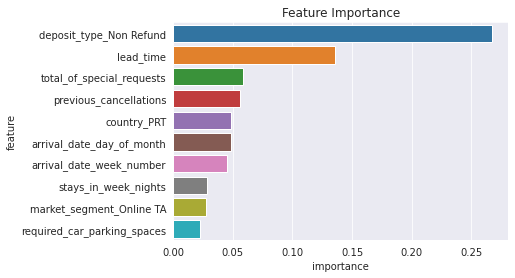

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning and Overfitting


`max_depth`

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=11)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 17.7 s, sys: 48.8 ms, total: 17.8 s
Wall time: 17.8 s


In [ ]:
errors_df

Max Depth  Training Error  Validation Error
0           1        0.231097          0.259705
1           2        0.205951          0.264919
2           3        0.203220          0.259753
3           4        0.193195          0.239892
4           5        0.171696          0.216903
5           6        0.164911          0.203346
6           7        0.147504          0.198464
7           8        0.137517          0.195431
8           9        0.129932          0.198512
9          10        0.123972          0.194388
10         11        0.118229          0.197943
11         12        0.113236          0.199507
12         13        0.107010          0.209556
13         14        0.098865          0.204342
14         15        0.091559          0.206475
15         16        0.084749          0.208276
16         17        0.077164          0.212874
17         18        0.069934          0.230128
18         19        0.063123          0.224866
19         20        0.055767          0.236621

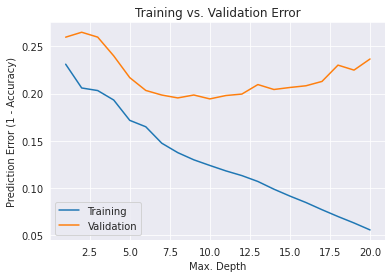

In [ ]:
plt.figure()
plt.plot(np.array(errors_df['Max Depth']), np.array(errors_df['Training Error']))
plt.plot(np.array(errors_df['Max Depth']), np.array(errors_df['Validation Error']))
plt.title('Training vs. Validation Error')
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])



### Automate hyperparameter tuning and ploting

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def test_params(**params):
    '''Test model with parameters and return root of mean squared error (RMSE) for train and validation.'''
    # Change this line for different model:
    model = DecisionTreeClassifier(random_state=11, **params).fit(X_train, train_targets)
    train_rmse = mean_squared_error(model.predict(X_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), val_targets, squared=False)
    return train_rmse, val_rmse

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, '-o')
    plt.plot(param_values, val_errors, '-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

NameError: ignored

`max_leaf_nodes`

In [ ]:
test_param_and_plot('max_leaf_nodes', [8, 12, 16, 20, 24, 28])

`max_features`

### Evaluate with best hyperparameters

In [ ]:
# Create the model
# best parameters: max_depth=10, max_leaf_nodes=20
model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, random_state=11)
# Fit the model to the training data
model.fit(X_train, train_targets)

Accuracy: 83.00%


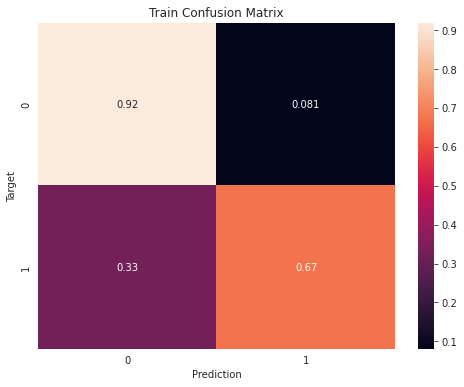

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Train')

Accuracy: 79.41%


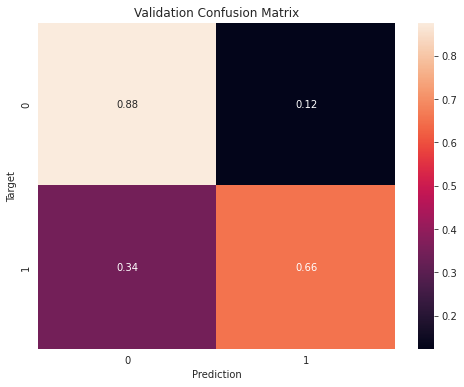

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 76.12%


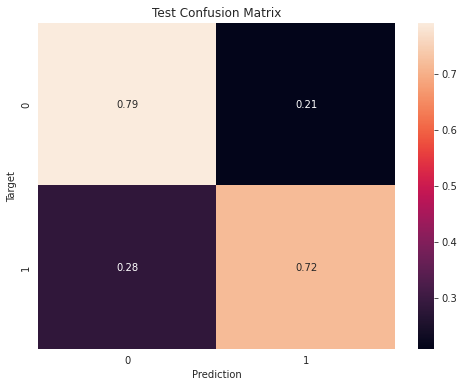

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

After hyperparameters tuning testing accuracy encreased from 71% to 76%.

## Training a Random Forest

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=11)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=11` ensures that the we get the same results for each execution.

In [ ]:
%%time
model.fit(X_train, train_targets)

CPU times: user 21.5 s, sys: 171 ms, total: 21.7 s
Wall time: 22.4 s


RandomForestClassifier(n_jobs=-1, random_state=11)

In [ ]:
model.score(X_train, train_targets)

0.9946126577131749

In [ ]:
model.score(X_val, val_targets)

0.7879319334502536

In [ ]:
model.score(X_test, test_targets)

0.7564063297600817

In [ ]:
len(model.estimators_)

100

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

feature  importance
0                    lead_time    0.114475
252    deposit_type_Non Refund    0.083434
171                country_PRT    0.072772
14   total_of_special_requests    0.058483
3    arrival_date_day_of_month    0.054578
251    deposit_type_No Deposit    0.051613
2     arrival_date_week_number    0.048067
9       previous_cancellations    0.043178
5         stays_in_week_nights    0.038525
4      stays_in_weekend_nights    0.026059

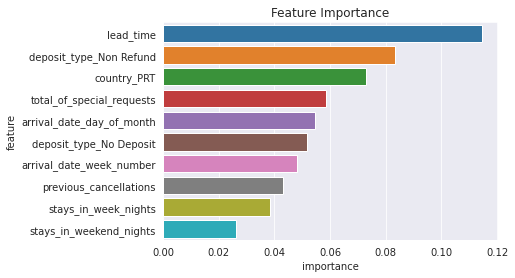

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning with Random Forests


In [ ]:
def test_params(**params):
    '''Test model with parameters and return root of mean squared error (RMSE) for train and validation.'''
    # Change this line for different model:
    model = RandomForestClassifier(n_jobs=-1, random_state=11, **params).fit(X_train, train_targets)
    train_rmse = mean_squared_error(model.predict(X_train), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), val_targets, squared=False)
    return train_rmse, val_rmse

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, '-o')
    plt.plot(param_values, val_errors, '-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

`n_estimators`

In [ ]:
test_param_and_plot('n_estimators', [100, 500])

Best `n_estimators` is 100

In [ ]:
# Best hyperparameters so far:

# model = RandomForestClassifier(n_jobs=-1, 
#                                random_state=11, 
#                                n_estimators=100).fit(X_train, train_targets)

`max_depth`

In [ ]:
test_param_and_plot('max_depth', [5, 10, 20, 30, 40])

Best `max_depth` parameter is 20.

`max_leaf_nodes`

In [ ]:
test_param_and_plot('max_leaf_nodes', range(2, 10))

In [ ]:
test_params(class_weight={0: 1, 1: 2})

In [ ]:
test_params(bootstrap=False)

In [ ]:
test_params(bootstrap=True) 
# default

### Putting it together

Train random forest with custom hyperparameters. 

In [ ]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=11, 
                               n_estimators=200,
                               max_depth=10,
                               max_leaf_nodes=20,
                               class_weight={0: 1, 1: 2}).fit(X_train, train_targets)

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

Final accuracy is 76.49%

## Making Predictions on New Inputs


In [ ]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df.is_repeated_guest = input_df.is_repeated_guest.astype('object')
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [ ]:
bookings_df.head(1)

In [ ]:
new_input = {'hotel': 'Resort Hotel',
            'lead_time': 1,
            'arrival_date_year': 2017,
            'arrival_date_month': 'July',
            'arrival_date_week_number': 27,
            'arrival_date_day_of_month': 25,
            'stays_in_weekend_nights': 3,
            'stays_in_week_nights': 2,
            'adults': 2,
            'children': 1,
            'babies': 0,
            'meal': 'BB',
            'country': 'PRT',
            'market_segment': 'Direct',
            'distribution_channel': 'Direct',
            'is_repeated_guest': 0,
            'previous_cancellations': 4,
            'previous_bookings_not_canceled': 0,
            'reserved_room_type': 'C',
            'assigned_room_type': 'C',
            'booking_changes': 7,
            'deposit_type': 'No Deposit',
            'days_in_waiting_list': 0,
            'customer_type': 'Transient',
            'adr': 0.0,
            'required_car_parking_spaces': 0,
            'total_of_special_requests': 0,
            'total_children': 0,
            'total_people': 3}

In [ ]:
pred, prob = predict_input(model, new_input)
print("Prediction: {}, probability: {}".format(pred, prob))

## Saving and Loading Trained Models


In [ ]:
import joblib

In [ ]:
booking_cancel = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(booking_cancel, 'booking_cancel.joblib')

In [ ]:
booking_cancel2 = joblib.load('booking_cancel.joblib')

In [ ]:
test_preds2 = booking_cancel2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)